### 유전 알고리즘 
#### - 유전 알고리즘(genetic algorithm, GA)은 생물체가 환경에 적응하면서 진화(evolution)해 가는 모습을 모방하여 탄생한 확률적 전역 최적화 알고리즘(stochastic global optimization algorithm)임.
#### - 진화적 알고리즘은 다양한 문제에 대해 경험적으로 솔루션을 제시하는 메타-휴리스틱(Meta Heuristic)이라 부른다.(여기서 메타는 특정문제에 특화되어 있지 않고 광범위한 문제에 대응할 수 있는 것을 의미, 휴리스틱은 반드시 정확한 솔루션을 얻을 수 있는 것은 아니지만 비교적 단시간에 어느 정도까지 근사한 해를 얻을 수 있는 방법을 의미)
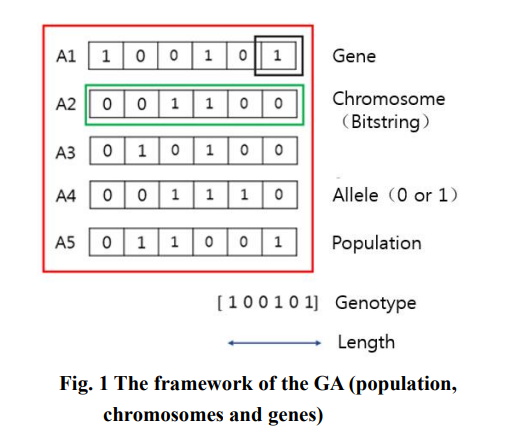

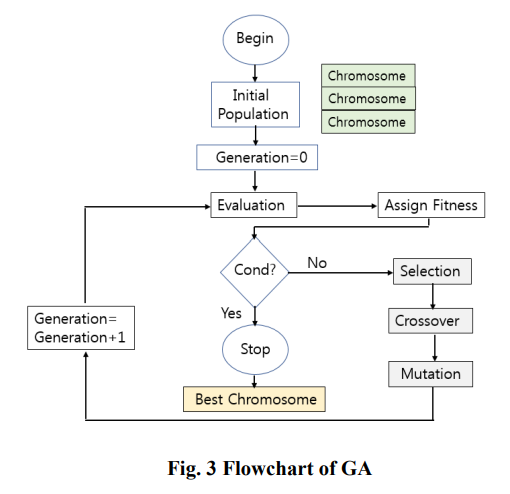

### 
### 하이퍼파라미터로써 정해야하는 것들:
#### 1. Chromosome을 어떻게 표현할 것인가?
#### 2. Population : chromosome을 몇 개로 할 것인가?
#### 3. Evaluation 적합도 평가를 무엇으로 할 것인가?
#### 4. Selection 과정을 무엇으로 할 것인가?
#### 5. Crossover 을 어떻게 할 것인가?
#### 6. Mutation을 어떻게 할 것인가?
#### 7. 언제 종료할 것인가?

# 
### 참고자료 : 유전알고리즘 : 문병로, 두양사, 2003
#### http://www.aistudy.com/biology/genetic/operator_moon.htm

# 
# 
## Genetic Algorithm Implementation in Python 논문을 따라가본 코드
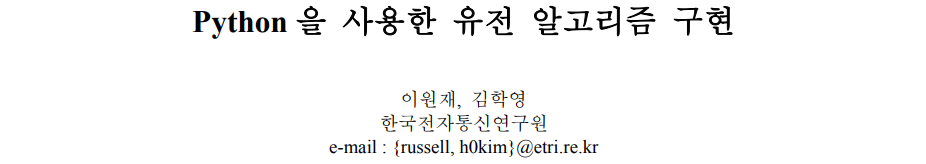

# 
### 1. 초기 모집단(Population) 생성
#### TSP 를 도시가 9개인 경우에 대해
#### population = 5
#### 여기서 chromosome은 경로를 나타내며, gene은 각 도시를 나타냄
##### 논문 코드 :

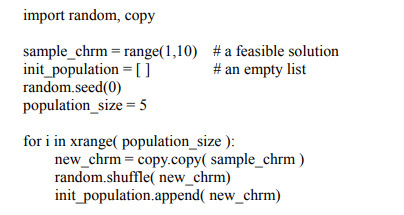

In [1]:
import random, copy
import numpy as np

sample_chrm = np.arange(1,10) # feasible solution
init_population = []
random.seed(0)
population_size = 5

for i in range(population_size):
    new_chrm = copy.copy(sample_chrm)
    random.shuffle(new_chrm)
    
    init_population.append(new_chrm)
    
print(init_population)

[array([8, 6, 2, 4, 5, 3, 1, 9, 7]), array([3, 1, 4, 9, 7, 2, 5, 6, 8]), array([3, 1, 4, 9, 7, 6, 8, 5, 2]), array([8, 7, 9, 3, 1, 5, 4, 6, 2]), array([2, 7, 6, 1, 3, 5, 9, 8, 4])]


#### Q1. 여기서는, 도시의 시작이 어디인지 기준이 없음 (어디서부터 시작하든지 상관없으나 끝은 처음 도시로 돌아오면 되는 것인가?)
#### Q2. 문제를 단순화 하려면 도시의 시작을 정해놓는 것이 좋을 것임(예: 1번도시 부터 시작)

# 
# 
### 2. 적합도 평가(fitness evaluation)
#### 적응도 평가를 위한 cost matrix : 1번부터 9번 도시까지 가는 비용 (10X10 행렬에서 첫행첫열은 모두 0임, 인덱싱 떄문에 그런듯)
#### 대칭이라, A에서 B도시로 가던, B도시에서 A도시로 가던 비용이 같음
#### 1-9번 도시에 대해 각 거리간 비용을 나타낸 그래프를 그려보면 아래와 같음
##### (그래프 그리는 사이트) : https://csacademy.com/app/graph_editor/

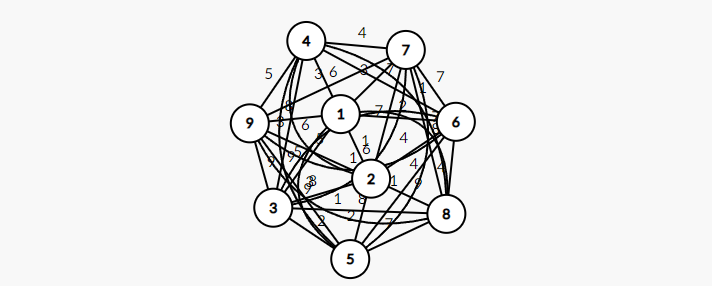

##### 논문 코드 :
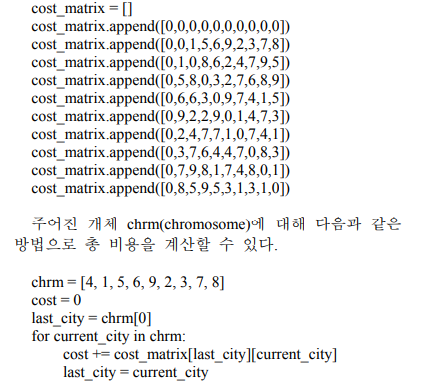

In [2]:
cost_matrix = []
cost_matrix.append([0,0,0,0,0,0,0,0,0,0])
cost_matrix.append([0,0,1,5,6,9,2,3,7,8])
cost_matrix.append([0,1,0,8,6,2,4,7,9,5])
cost_matrix.append([0,5,8,0,3,2,7,6,8,9])
cost_matrix.append([0,6,6,3,0,9,7,4,1,5])
cost_matrix.append([0,9,2,2,9,0,1,4,7,3])
cost_matrix.append([0,2,4,7,7,1,0,7,4,1])
cost_matrix.append([0,3,7,6,4,4,7,0,8,3])
cost_matrix.append([0,7,9,8,1,7,4,8,0,1])
cost_matrix.append([0,8,5,9,5,3,1,3,1,0])
print("cost matrix : i번째 도시에서 j번째 도시로 갈 때 발생하는 비용\n")
print("-, -, 1, 2, 3, 4, 5, 6, 7, 8, 9번 도시")
for i in range(10):
    print(i, cost_matrix[i])

print('\n\n')
chrm = [4, 1, 5, 6, 9, 2, 3, 7, 8]
print("도시 방문 순서 : ", chrm)
cost = 0
last_city = chrm[0]
for i, current_city in enumerate(chrm):
    cost += cost_matrix[last_city][current_city]
    print(i+1, "th 번째 총 방문 비용 : ",cost)
    last_city = current_city

cost matrix : i번째 도시에서 j번째 도시로 갈 때 발생하는 비용

-, -, 1, 2, 3, 4, 5, 6, 7, 8, 9번 도시
0 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
1 [0, 0, 1, 5, 6, 9, 2, 3, 7, 8]
2 [0, 1, 0, 8, 6, 2, 4, 7, 9, 5]
3 [0, 5, 8, 0, 3, 2, 7, 6, 8, 9]
4 [0, 6, 6, 3, 0, 9, 7, 4, 1, 5]
5 [0, 9, 2, 2, 9, 0, 1, 4, 7, 3]
6 [0, 2, 4, 7, 7, 1, 0, 7, 4, 1]
7 [0, 3, 7, 6, 4, 4, 7, 0, 8, 3]
8 [0, 7, 9, 8, 1, 7, 4, 8, 0, 1]
9 [0, 8, 5, 9, 5, 3, 1, 3, 1, 0]



도시 방문 순서 :  [4, 1, 5, 6, 9, 2, 3, 7, 8]
1 th 번째 총 방문 비용 :  0
2 th 번째 총 방문 비용 :  6
3 th 번째 총 방문 비용 :  15
4 th 번째 총 방문 비용 :  16
5 th 번째 총 방문 비용 :  17
6 th 번째 총 방문 비용 :  22
7 th 번째 총 방문 비용 :  30
8 th 번째 총 방문 비용 :  36
9 th 번째 총 방문 비용 :  44


# 
# 
### 3. 선별(Selection) : 현 세대 모집단으로부터 다음 세대의 생존할 개체를 선택하는 과정
#### - Roulette Wheel Selection: 각 개체의 적합도 값을 전체 적합도 값의 합으로 나누어 적합도 값에 비례하는 확률로 개체를 선택하는 방법입니다. 이 방법은 전체 적합도 값의 합이 커질수록 선택 확률이 높아지므로, 높은 적합도를 가진 개체가 선택될 확률이 높아집니다.
#### - Tournament Selection: 랜덤하게 선택된 개체들 중에서 가장 높은 적합도 값을 가지는 개체를 선택하는 방법입니다. 이 방법은 랜덤성이 적용되므로, 다양한 개체들이 선택되며, 높은 적합도를 가진 개체가 선택될 확률이 높아집니다.
#### -  Rank Selection: 각 개체를 적합도 값에 따라 순위를 매긴 후, 상위 개체들을 선택하는 방법입니다. 이 방법은 개체 간 적합도 값 차이가 크지 않을 때, 다양한 개체들이 선택되는 효과를 가집니다.
#### - Truncation Selection: 개체들을 적합도 값에 따라 내림차순으로 정렬한 후, 상위 n개의 개체를 선택하는 방법입니다. 이 방법은 상위 개체들의 적합도 값을 모두 사용하지 않고, 일부 개체들만 사용하므로, 개체 간 다양성이 낮아질 수 있습니다.
## 
#### fitness 값은 적을수록 좋음(도시간 거리 비용들의 총합이므로 적을수록 좋음)
## 
#### 여기선 확률바퀴 방법 사용
#### 만약 Population이 10개의 chromosome으로 구성되어 있고 10개 chromosome에 대한 적합도가 fitness_list와 같다고해보자
#### 확률바퀴 방법은 이 적합도 리스트에 대응하는 확률을 구해주는 것

##### 논문 코드 : 
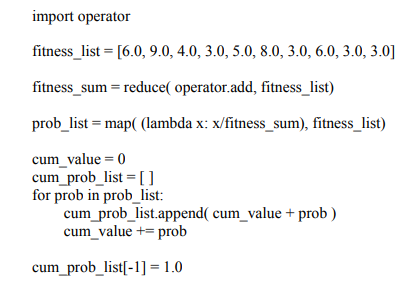

In [3]:
import operator
from functools import reduce

fitness_list = [6.0, 9.0, 4.0, 3.0, 5.0, 8.0, 3.0, 6.0, 3.0, 3.0]
fitness_sum = reduce( operator.add, fitness_list)
prob_list = map( (lambda x: x/fitness_sum), fitness_list)
cum_value = 0
cum_prob_list = [ ]

for i, prob in enumerate(prob_list):
    print("적합도 : ", fitness_list[i], "에 대한 확률 :", prob)
    cum_prob_list.append( cum_value + prob )
    cum_value += prob
cum_prob_list[-1] = 1.0 

적합도 :  6.0 에 대한 확률 : 0.12
적합도 :  9.0 에 대한 확률 : 0.18
적합도 :  4.0 에 대한 확률 : 0.08
적합도 :  3.0 에 대한 확률 : 0.06
적합도 :  5.0 에 대한 확률 : 0.1
적합도 :  8.0 에 대한 확률 : 0.16
적합도 :  3.0 에 대한 확률 : 0.06
적합도 :  6.0 에 대한 확률 : 0.12
적합도 :  3.0 에 대한 확률 : 0.06
적합도 :  3.0 에 대한 확률 : 0.06


In [4]:
print("누적확률 : ")
print(cum_prob_list)

누적확률 : 
[0.12, 0.3, 0.38, 0.44, 0.54, 0.7000000000000001, 0.76, 0.88, 0.94, 1.0]


#### 위 코드는 랜덤한 확률 값을 생성해서 누적확률값과 비교하여 누적확률값이 더 큰 경우에 그때 해당하는 인덱스를 선택
#### Q1 : 일단, fitness 값이 작을수록 우수한 chromosome인데 위 코드에서는 이를 반영한 확률값이 적은순으로 열거된 것도 아님, 왜 이렇게 하는지 

##### 논문 코드 :
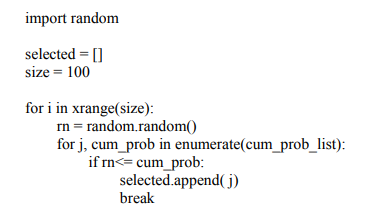

In [5]:
import random
import sys, os
selected = []
size = 100
for i in range(size):
    rn = random.random() # 0과 1 사이 실수 랜덤 생성
    if i == 0 :
        print("boundary 확률을 나타내는 첫 번째 랜덤값: ", rn)
    for j, cum_prob in enumerate(cum_prob_list):
        if i == 0:
            print(j, cum_prob)
            if rn<= cum_prob: # 적합도 리스트 안에 확률을 모두 비교 <-> 생성된 0과1 랜덤 수와 , 만약 더 크면 선택되고 다음
                selected.append( j)
                break
        else :
            if rn<= cum_prob: # 적합도 리스트 안에 확률을 모두 비교 <-> 생성된 0과1 랜덤 수와 , 만약 더 크면 선택되고 다음
                selected.append( j)
                break
print("\n",selected)

boundary 확률을 나타내는 첫 번째 랜덤값:  0.09327186435241008
0 0.12

 [0, 7, 6, 7, 5, 5, 7, 2, 6, 6, 0, 8, 1, 7, 1, 5, 0, 9, 7, 9, 4, 2, 1, 1, 2, 8, 1, 7, 5, 1, 0, 7, 2, 1, 1, 7, 0, 9, 1, 0, 5, 1, 1, 0, 0, 5, 7, 5, 7, 4, 4, 1, 1, 5, 7, 3, 1, 4, 5, 6, 9, 2, 2, 0, 5, 2, 1, 0, 1, 6, 2, 1, 3, 0, 7, 7, 1, 7, 5, 8, 5, 0, 1, 1, 7, 0, 0, 7, 0, 5, 1, 9, 6, 4, 6, 0, 5, 5, 5, 7]


In [6]:
print("선택된 chromosome 수 : ", len(selected))
print('\n',selected)

for i in range(1,10):
    print(i, "인 개수 : ",selected.count(i))

선택된 chromosome 수 :  100

 [0, 7, 6, 7, 5, 5, 7, 2, 6, 6, 0, 8, 1, 7, 1, 5, 0, 9, 7, 9, 4, 2, 1, 1, 2, 8, 1, 7, 5, 1, 0, 7, 2, 1, 1, 7, 0, 9, 1, 0, 5, 1, 1, 0, 0, 5, 7, 5, 7, 4, 4, 1, 1, 5, 7, 3, 1, 4, 5, 6, 9, 2, 2, 0, 5, 2, 1, 0, 1, 6, 2, 1, 3, 0, 7, 7, 1, 7, 5, 8, 5, 0, 1, 1, 7, 0, 0, 7, 0, 5, 1, 9, 6, 4, 6, 0, 5, 5, 5, 7]
1 인 개수 :  21
2 인 개수 :  8
3 인 개수 :  2
4 인 개수 :  5
5 인 개수 :  16
6 인 개수 :  7
7 인 개수 :  17
8 인 개수 :  3
9 인 개수 :  5


# 
# 
### 교차(cross over)
#### 여기서 선택한 교차 방법은 순서교차(order crossover) 방법임.
#### TSP 문제 특성상 지나왔던 도시를 다시 가면 안돼므로 숫자(도시를 나타내는 gene)가 중복되어 나타나면 안됨(infeasible solution).
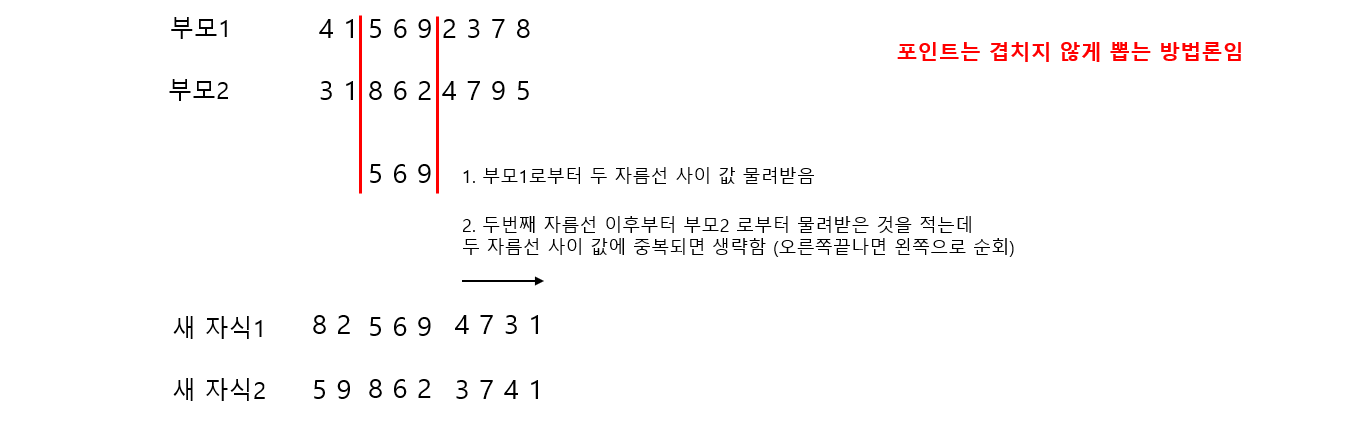

##### 논문 코드 :
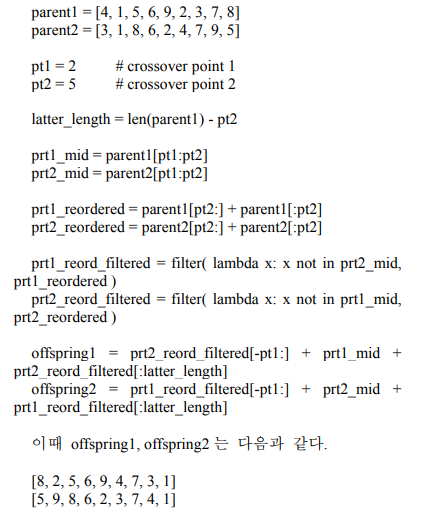

In [7]:
parent1 = [4, 1, 5, 6, 9, 2, 3, 7, 8]
parent2 = [3, 1, 8, 6, 2, 4, 7, 9, 5]
pt1 = 2 # crossover point 1
pt2 = 5 # crossover point 2
latter_length = len(parent1) - pt2
print(latter_length,'\n')


prt1_mid = parent1[pt1:pt2]
print(prt1_mid)
prt2_mid = parent2[pt1:pt2]
print(prt2_mid,'\n')


prt1_reordered = parent1[pt2:] + parent1[:pt2]
print(prt1_reordered)
prt2_reordered = parent2[pt2:] + parent2[:pt2]
print(prt2_reordered,'\n')


prt1_reord_filtered = list(filter( lambda x: x not in prt2_mid, prt1_reordered ))
print(prt1_reord_filtered)
prt2_reord_filtered = list(filter( lambda x: x not in prt1_mid, prt2_reordered ))
print(prt2_reord_filtered,'\n')


offspring1 = prt2_reord_filtered[-pt1:] + prt1_mid + prt2_reord_filtered[:latter_length]
offspring2 = prt1_reord_filtered[-pt1:] + prt2_mid + prt1_reord_filtered[:latter_length]

print(offspring1)
print(offspring2)

4 

[5, 6, 9]
[8, 6, 2] 

[2, 3, 7, 8, 4, 1, 5, 6, 9]
[4, 7, 9, 5, 3, 1, 8, 6, 2] 

[3, 7, 4, 1, 5, 9]
[4, 7, 3, 1, 8, 2] 

[8, 2, 5, 6, 9, 4, 7, 3, 1]
[5, 9, 8, 6, 2, 3, 7, 4, 1]


# 
# 
### 돌연변이(mutation) : 구현 생략
##### 논문 코드 : 
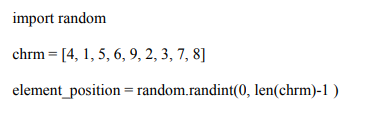
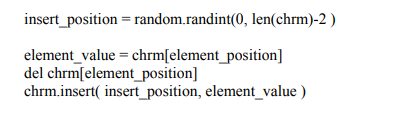

# 
# 
# 
# 종합구현
### 이제, 종합적으로 구현해보려 했으나 너무 뛰엄뛰엄 있어서 Chat -GPT 에게 짜달라고 함, 그러나 코드가 길어져 자꾸 끊김.
### 그래서 각 모듈(Population, Selection, Crossover 등)을 하나씩 구현해봄
### 1. Chat-GPT에게 부분 부분을 짜달라고 부탁하거나
### 2. 직접 짬
### 

# TSP 문제 파이썬 코드 구현
# TSP 문제 정의 : 
### 여러 도시들이 있고 한 도시에서 다른 도시로 이동하는 비용이 모두 주어졌을 때, 모든 도시들을 단 한 번만 방문하고 원래 시작점으로 돌아오는 최소 비용의 이동 순서를 구하는 것이다.
### 
### 하이퍼파라미터로써 정해야하는 것들:
#### 1. Chromosome을 어떻게 표현할 것인가?
#### 2. Population : chromosome을 몇 개로 할 것인가?
#### 3. Evaluation 적합도 평가를 무엇으로 할 것인가?
#### 4. Selection 과정을 무엇으로 할 것인가?
#### 5. Crossover 을 어떻게 할 것인가?
#### 6. Mutation을 어떻게 할 것인가?
#### 7. 언제 종료할 것인가?

# 
### 1. Chromosome을 어떻게 표현할 것인가?
#### : Chromosome은 루트, gene은 각 도시를 표현함(위 문제로 해결하기 위해 1번 -9번 도시까지 있다고해보자)
### 2. Population : chromosome을 몇 개로 할 것인가?
#### : Population 은 100개로 정함

In [8]:
import random, copy

sample_chrm = np.arange(1,10) # feasible solution
init_population = []
random.seed(0)
population_size = 100

for i in range(population_size):
    new_chrm = copy.copy(sample_chrm)
    random.shuffle(new_chrm)
    
    init_population.append(new_chrm)
    
print(np.shape(init_population))
print("예: 1번째 chromosome :", init_population[0])
print("예: 2번째 chromosome :", init_population[1])

(100, 9)
예: 1번째 chromosome : [8 6 2 4 5 3 1 9 7]
예: 2번째 chromosome : [3 1 4 9 7 2 5 6 8]


#### 시작도시는 랜덤이며, 각 도시가 겹치지 않게 표현하였음

# 
### 3. Fitness evaluation을 무엇으로 할 것인가?
#### 해당 논문에서는 각 도시별 비용을 cost matrix로 표현하였음(각 도시간 거리는 동일하다고 가정)

In [9]:
cost_matrix = []
cost_matrix.append([0,0,0,0,0,0,0,0,0,0])
cost_matrix.append([0,0,1,5,6,9,2,3,7,8])
cost_matrix.append([0,1,0,8,6,2,4,7,9,5])
cost_matrix.append([0,5,8,0,3,2,7,6,8,9])
cost_matrix.append([0,6,6,3,0,9,7,4,1,5])
cost_matrix.append([0,9,2,2,9,0,1,4,7,3])
cost_matrix.append([0,2,4,7,7,1,0,7,4,1])
cost_matrix.append([0,3,7,6,4,4,7,0,8,3])
cost_matrix.append([0,7,9,8,1,7,4,8,0,1])
cost_matrix.append([0,8,5,9,5,3,1,3,1,0])
print("cost matrix : i번째 도시에서 j번째 도시로 갈 때 발생하는 비용\n")
print("-, -, 1, 2, 3, 4, 5, 6, 7, 8, 9번 도시")
for i in range(10):
    print(i, cost_matrix[i])

print('\n\n')
chrm = init_population[0]
print("1번 도시 방문 순서 chromosome: ", chrm)
cost = 0
last_city = chrm[0]
for i, current_city in enumerate(chrm):
    cost += cost_matrix[last_city][current_city]
    print(i+1, "th 번째 총 방문 비용 : ",cost)
    last_city = current_city
    
    if i == 8: # 마지막 도시이면 첫 번째 도시로 가서 비용이 발생해야함
        cost += cost_matrix[last_city][chrm[0]]
        print("다시 처음으로 돌아온 도시 총비용: ", cost)
print("총 발생 비용 : ", 1/cost)
print('\n')


chrm = init_population[1]
print("2번 도시 방문 순서 chromosome: ", chrm)
cost = 0
last_city = chrm[0]
for i, current_city in enumerate(chrm):
    cost += cost_matrix[last_city][current_city]
    print(i+1, "th 번째 총 방문 비용 : ",cost)
    last_city = current_city
    
    if i == 8: # 마지막 도시이면 첫 번째 도시로 가서 비용이 발생해야함
        cost += cost_matrix[last_city][chrm[0]]
        print("다시 처음으로 돌아온 도시 총비용: ", cost)
        
print("총 발생 비용 : ", 1/cost)

cost matrix : i번째 도시에서 j번째 도시로 갈 때 발생하는 비용

-, -, 1, 2, 3, 4, 5, 6, 7, 8, 9번 도시
0 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
1 [0, 0, 1, 5, 6, 9, 2, 3, 7, 8]
2 [0, 1, 0, 8, 6, 2, 4, 7, 9, 5]
3 [0, 5, 8, 0, 3, 2, 7, 6, 8, 9]
4 [0, 6, 6, 3, 0, 9, 7, 4, 1, 5]
5 [0, 9, 2, 2, 9, 0, 1, 4, 7, 3]
6 [0, 2, 4, 7, 7, 1, 0, 7, 4, 1]
7 [0, 3, 7, 6, 4, 4, 7, 0, 8, 3]
8 [0, 7, 9, 8, 1, 7, 4, 8, 0, 1]
9 [0, 8, 5, 9, 5, 3, 1, 3, 1, 0]



1번 도시 방문 순서 chromosome:  [8 6 2 4 5 3 1 9 7]
1 th 번째 총 방문 비용 :  0
2 th 번째 총 방문 비용 :  4
3 th 번째 총 방문 비용 :  8
4 th 번째 총 방문 비용 :  14
5 th 번째 총 방문 비용 :  23
6 th 번째 총 방문 비용 :  25
7 th 번째 총 방문 비용 :  30
8 th 번째 총 방문 비용 :  38
9 th 번째 총 방문 비용 :  41
다시 처음으로 돌아온 도시 총비용:  49
총 발생 비용 :  0.02040816326530612


2번 도시 방문 순서 chromosome:  [3 1 4 9 7 2 5 6 8]
1 th 번째 총 방문 비용 :  0
2 th 번째 총 방문 비용 :  5
3 th 번째 총 방문 비용 :  11
4 th 번째 총 방문 비용 :  16
5 th 번째 총 방문 비용 :  19
6 th 번째 총 방문 비용 :  26
7 th 번째 총 방문 비용 :  28
8 th 번째 총 방문 비용 :  29
9 th 번째 총 방문 비용 :  33
다시 처음으로 돌아온 도시 총비용:  41
총 발생 비용 :  0.024390243902

#### 마지막 도시에서 처음 도시로 다시 와야하므로 그 부분 코딩,
#### 여기서 fitness는 도시를 순회하는 비용의 역수로 정의, 즉 클수록 좋은 chromosome 임(향후 selection 단계에서 룰렛 휠 선택방법을 사용하려고)

#### 밑 코드는 Chat gpt에게 fitness 함수를 부탁하고 일부 수정한 것(마지막도시에서 처음 도시로 돌아오는 비용 추가)

In [10]:
# 각 경로의 적합도를 계산하는 함수
def fitness(path, distances):
    total_distance = 0
    for i in range(len(path)-1):
        total_distance += distances[path[i]][path[i+1]]

        if i == len(path)-2:
            total_distance += distances[path[i+1]][path[0]]
    return 1/total_distance

#### cost_matrix 정의

In [11]:
cost_matrix = []
cost_matrix.append([0,0,0,0,0,0,0,0,0,0])
cost_matrix.append([0,0,1,5,6,9,2,3,7,8])
cost_matrix.append([0,1,0,8,6,2,4,7,9,5])
cost_matrix.append([0,5,8,0,3,2,7,6,8,9])
cost_matrix.append([0,6,6,3,0,9,7,4,1,5])
cost_matrix.append([0,9,2,2,9,0,1,4,7,3])
cost_matrix.append([0,2,4,7,7,1,0,7,4,1])
cost_matrix.append([0,3,7,6,4,4,7,0,8,3])
cost_matrix.append([0,7,9,8,1,7,4,8,0,1])
cost_matrix.append([0,8,5,9,5,3,1,3,1,0])
print("cost matrix : i번째 도시에서 j번째 도시로 갈 때 발생하는 비용\n")
print("-, -, 1, 2, 3, 4, 5, 6, 7, 8, 9번 도시")
for i in range(10):
    print(i, cost_matrix[i])

cost matrix : i번째 도시에서 j번째 도시로 갈 때 발생하는 비용

-, -, 1, 2, 3, 4, 5, 6, 7, 8, 9번 도시
0 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
1 [0, 0, 1, 5, 6, 9, 2, 3, 7, 8]
2 [0, 1, 0, 8, 6, 2, 4, 7, 9, 5]
3 [0, 5, 8, 0, 3, 2, 7, 6, 8, 9]
4 [0, 6, 6, 3, 0, 9, 7, 4, 1, 5]
5 [0, 9, 2, 2, 9, 0, 1, 4, 7, 3]
6 [0, 2, 4, 7, 7, 1, 0, 7, 4, 1]
7 [0, 3, 7, 6, 4, 4, 7, 0, 8, 3]
8 [0, 7, 9, 8, 1, 7, 4, 8, 0, 1]
9 [0, 8, 5, 9, 5, 3, 1, 3, 1, 0]


In [12]:
print("1번째 도시 방문 순서 chromosome:", init_population[0])
cost = fitness(path=init_population[0], distances=cost_matrix)
print("비용 : ",cost)

print("2번째 도시 방문 순서 chromosome:", init_population[1])
cost = fitness(path=init_population[1], distances=cost_matrix)
print("비용 : ",cost)

1번째 도시 방문 순서 chromosome: [8 6 2 4 5 3 1 9 7]
비용 :  0.02040816326530612
2번째 도시 방문 순서 chromosome: [3 1 4 9 7 2 5 6 8]
비용 :  0.024390243902439025


# 
### 4. Selection 과정을 무엇으로 할 것인가?
#### - Roulette Wheel Selection: 각 개체의 적합도 값을 전체 적합도 값의 합으로 나누어 적합도 값에 비례하는 확률로 개체를 선택하는 방법입니다. 이 방법은 전체 적합도 값의 합이 커질수록 선택 확률이 높아지므로, 높은 적합도를 가진 개체가 선택될 확률이 높아집니다.

In [13]:
import random

# 경로를 선택하는 함수
def roulette_wheel_selection(paths, distances):
    print("population :", len(paths))
    total_fitness = sum([fitness(path, distances) for path in paths])
    print("전체 적합도 값 :",total_fitness, '\n')
    
    selection_probs = [fitness(path, distances)/total_fitness for path in paths]
    print("각 개체 적합도 / 전체 적합도 = 상대 적합도(Relative fitness) \n",np.round(selection_probs,3))

    cumulative_probs = [sum(selection_probs[:i+1]) for i in range(len(selection_probs))]
    print("누적 상대 적합도 \n", np.round(cumulative_probs,3))
    r = random.uniform(0, 1)
    print("\n0과 1 사이 boundary 확률 값 : ", r)
    for i in range(len(cumulative_probs)):
        if r < cumulative_probs[i]:
            print("idx ", i)
            return paths[i]

In [14]:
roulette_wheel_selection(paths=init_population, distances=cost_matrix)

population : 100
전체 적합도 값 : 2.2514960704664992 

각 개체 적합도 / 전체 적합도 = 상대 적합도(Relative fitness) 
 [0.009 0.011 0.009 0.007 0.013 0.009 0.009 0.008 0.008 0.009 0.008 0.01
 0.013 0.009 0.01  0.009 0.013 0.01  0.012 0.008 0.01  0.01  0.009 0.008
 0.011 0.011 0.01  0.012 0.008 0.01  0.009 0.012 0.012 0.014 0.01  0.008
 0.011 0.009 0.01  0.013 0.01  0.01  0.01  0.009 0.011 0.011 0.009 0.009
 0.009 0.009 0.012 0.01  0.01  0.011 0.01  0.009 0.009 0.008 0.011 0.007
 0.011 0.011 0.012 0.01  0.01  0.012 0.008 0.009 0.012 0.01  0.01  0.007
 0.013 0.009 0.008 0.011 0.009 0.01  0.012 0.016 0.009 0.01  0.012 0.013
 0.009 0.01  0.01  0.008 0.008 0.009 0.008 0.01  0.012 0.008 0.011 0.009
 0.01  0.011 0.009 0.013]
누적 상대 적합도 
 [0.009 0.02  0.029 0.036 0.049 0.059 0.067 0.075 0.083 0.092 0.1   0.11
 0.123 0.133 0.142 0.151 0.164 0.174 0.186 0.193 0.204 0.213 0.222 0.231
 0.241 0.252 0.262 0.274 0.282 0.292 0.301 0.313 0.325 0.339 0.349 0.356
 0.368 0.377 0.387 0.4   0.41  0.419 0.429 0.438 0.449 0.46  0.46

array([5, 1, 4, 6, 9, 8, 3, 2, 7])

In [15]:
print(init_population[8])

[4 1 8 3 9 5 7 6 2]


#### 다음과 같은 룰렛 휠 선택 코드는
#### 1. 각 개체 적합도 / 전체 적합도 를 구해 0과1 사이 확률 값으로 변환 : 상대 적합도 -> 변환된 확률이 크게 배정될 수록 좋은 개체라는 의미임
#### 2. 누적 확률 적합도를 계산하여 boundary 확률값보다 큰 경우에 대응하는 개체 인덱스를 선택함.
#### Q1. 왜? 각 개체의 확률 적합도만 구하여 높은 확률 적합도를 가진 개체들을 선택하면 되는 것 아닌가?

#### - 그래서 룰렛 휠 선택 코드에서 
#### 1. 상대 적합도를 계산해서 상위 18개를 선택함
#### 2. 하위 2개도 선택함(돌연변이용, 열성 개체)

In [16]:
import random

# 경로를 선택하는 함수
def roulette_wheel_selection(paths, distances):
    print("population :", len(paths))
    total_fitness = sum([fitness(path, distances) for path in paths])
    print("전체 적합도 값 :",total_fitness, '\n')
    
    selection_probs = [fitness(path, distances)/total_fitness for path in paths]
    print("각 개체 적합도 / 전체 적합도 = 상대 적합도(Relative fitness) \n",np.round(selection_probs,3))
    
    sorted_list = sorted(enumerate(selection_probs), key=lambda x: x[1], reverse=True)
    sorted_indices = [index for index, value in sorted_list]
    print("가장 높은 상대 적합도 순으로 인덱스를 나열한 것 :",sorted_indices)
    
    selection_list = [paths[i] for i in sorted_indices[:18]]
    selection_list2 = [paths[i] for i in sorted_indices[-2:]]
    #selection_list = np.r_[selection_list1, selection_list2]
    selection_list.extend(selection_list2)
    return selection_list

In [17]:
selection_list = roulette_wheel_selection(paths=init_population, distances=cost_matrix)

population : 100
전체 적합도 값 : 2.2514960704664992 

각 개체 적합도 / 전체 적합도 = 상대 적합도(Relative fitness) 
 [0.009 0.011 0.009 0.007 0.013 0.009 0.009 0.008 0.008 0.009 0.008 0.01
 0.013 0.009 0.01  0.009 0.013 0.01  0.012 0.008 0.01  0.01  0.009 0.008
 0.011 0.011 0.01  0.012 0.008 0.01  0.009 0.012 0.012 0.014 0.01  0.008
 0.011 0.009 0.01  0.013 0.01  0.01  0.01  0.009 0.011 0.011 0.009 0.009
 0.009 0.009 0.012 0.01  0.01  0.011 0.01  0.009 0.009 0.008 0.011 0.007
 0.011 0.011 0.012 0.01  0.01  0.012 0.008 0.009 0.012 0.01  0.01  0.007
 0.013 0.009 0.008 0.011 0.009 0.01  0.012 0.016 0.009 0.01  0.012 0.013
 0.009 0.01  0.01  0.008 0.008 0.009 0.008 0.01  0.012 0.008 0.011 0.009
 0.01  0.011 0.009 0.013]
가장 높은 상대 적합도 순으로 인덱스를 나열한 것 : [79, 33, 72, 4, 16, 39, 12, 83, 99, 50, 65, 78, 27, 32, 62, 82, 92, 18, 31, 68, 36, 97, 1, 53, 60, 24, 25, 44, 45, 58, 61, 75, 94, 20, 29, 34, 51, 52, 11, 26, 38, 42, 54, 86, 40, 63, 64, 69, 85, 14, 17, 21, 41, 70, 77, 81, 91, 96, 2, 13, 55, 56, 84, 98, 48, 73, 80,

In [18]:
print(np.shape(selection_list))

(20, 9)


#### 선택된 상대적합도의 상위 18개와 하위 2개 개체에 대한 적합도 

In [19]:
total_fitness = [fitness(path, cost_matrix) for path in selection_list]
print(np.round(total_fitness,3))

[0.036 0.031 0.03  0.029 0.029 0.029 0.029 0.029 0.029 0.028 0.028 0.028
 0.027 0.027 0.027 0.027 0.027 0.026 0.016 0.015]


In [20]:
# 경로를 선택하는 함수
def roulette_wheel_selection(paths, distances):
    total_fitness = sum([fitness(path, distances) for path in paths])
    selection_probs = [fitness(path, distances)/total_fitness for path in paths]
    
    sorted_list = sorted(enumerate(selection_probs), key=lambda x: x[1], reverse=True)
    sorted_indices = [index for index, value in sorted_list]
    
    selection_list = [paths[i] for i in sorted_indices[:18]]
    selection_list2 = [paths[i] for i in sorted_indices[-2:]]
    selection_list.extend(selection_list2)
    return selection_list

# 
### 5. Crossover를 어떻게 할 것인가?
#### TSP(Traveling Salesman Problem)에서 유전 알고리즘을 사용할 때는 Order Crossover(OX)를 사용하는 것이 일반적입니다. OX는 부모 유전자에서 두 개의 연속적인 구간을 선택하고, 첫 번째 부모 유전자의 구간을 첫 번째 자식 유전자에 복사하고, 두 번째 부모 유전자의 구간을 두 번째 자식 유전자에 복사하는 방식입니다.

In [21]:
def order_crossover(parent1, parent2):
    child_list = []
    for k in range(5):
        size = len(parent1)
        gene_slice = slice(0, 0)
        while gene_slice.start == gene_slice.stop:
            gene_slice = slice(*sorted(np.random.randint(low=0, high=size, size=2)))
        child1 = [-1] * size
        child2 = [-1] * size
        child1[gene_slice] = parent1[gene_slice]
        child2[gene_slice] = parent2[gene_slice]
        remaining_positions = [i for i in range(size) if i not in range(gene_slice.start, gene_slice.stop)]
        remaining_values = [val for val in parent2 if val not in parent1[gene_slice]]
        j = 0
        for i in remaining_positions:
            child1[i] = remaining_values[j]
            j += 1
        remaining_positions = [i for i in range(size) if i not in range(gene_slice.start, gene_slice.stop)]
        remaining_values = [val for val in parent1 if val not in parent2[gene_slice]]
        j = 0
        for i in remaining_positions:
            child2[i] = remaining_values[j]
            j += 1
        child_list.append(child1)
        child_list.append(child2)
    return child_list

#### 위 코드에서는 먼저, 부모 유전자의 길이를 구한 후, 랜덤한 두 지점을 선택합니다. 이후, 첫 번째 자식 유전자에는 첫 번째 지점부터 두 번째 지점까지의 부분을, 두 번째 자식 유전자에는 두 번째 지점부터 첫 번째 지점까지의 부분을 복사합니다.

#### 이후, 첫 번째 자식 유전자에 대해서는, 선택된 부분을 제외한 나머지 부분에 대해서는 두 번째 부모 유전자에서 선택되지 않은 값들을 차례대로 추가합니다. 두 번째 자식 유전자에 대해서는, 동일한 방식으로 첫 번째 부모 유전자에서 선택되지 않은 값을 추가합니다. 이렇게 생성된 두 개의 자식 유전자를 반환합니다.

#### 상위 2개 개체에 대해 시행해본 결과 : child 를 각 5개씩 총10개 만듦

In [22]:
child = order_crossover(parent1=selection_list[0],parent2=selection_list[1])
print(child)

[[8, 4, 3, 5, 7, 1, 2, 9, 6], [4, 8, 3, 7, 9, 2, 1, 5, 6], [4, 5, 8, 3, 7, 9, 2, 1, 6], [4, 8, 3, 5, 9, 7, 1, 2, 6], [8, 4, 3, 5, 9, 1, 2, 6, 7], [9, 4, 8, 3, 7, 2, 1, 5, 6], [8, 4, 3, 9, 7, 1, 2, 5, 6], [4, 8, 3, 7, 9, 2, 1, 6, 5], [8, 4, 3, 5, 7, 9, 2, 1, 6], [4, 8, 3, 7, 9, 1, 2, 5, 6]]


#### 상위 18개와 하위 2개를 랜덤으로 섞어 한 쌍씩 들어가 5개씩 새 개체를 만들게 함

In [23]:
numbers = list(range(20))  # 0부터 20까지의 숫자 리스트 생성
random.shuffle(numbers)   # 리스트를 섞음

child_list = []
# 리스트에서 원소를 2개씩 겹치지 않게 뽑기
for i in range(0, len(numbers)-1, 2):
    pair = [numbers[i], numbers[i+1]]
    
    child = order_crossover(parent1=selection_list[pair[0]], parent2=selection_list[pair[1]])
    child_list.append(child)
child_list = np.reshape(child_list, (-1,9))
child_list = child_list.tolist()
print(child_list)
print(np.shape(child_list))

[[2, 5, 3, 6, 7, 8, 9, 1, 4], [4, 2, 3, 9, 7, 1, 6, 8, 5], [2, 3, 9, 6, 7, 8, 5, 1, 4], [2, 3, 8, 9, 7, 1, 6, 4, 5], [2, 9, 3, 6, 7, 8, 5, 1, 4], [4, 2, 3, 9, 7, 1, 6, 8, 5], [2, 5, 3, 6, 7, 9, 1, 4, 8], [4, 2, 3, 9, 7, 6, 8, 5, 1], [2, 5, 3, 6, 7, 9, 1, 4, 8], [4, 2, 3, 9, 7, 6, 8, 5, 1], [2, 4, 3, 1, 6, 8, 5, 7, 9], [1, 2, 6, 3, 5, 7, 8, 9, 4], [2, 4, 3, 5, 1, 6, 8, 7, 9], [1, 2, 6, 8, 3, 5, 7, 9, 4], [2, 4, 6, 8, 9, 3, 5, 7, 1], [2, 7, 3, 5, 1, 6, 8, 9, 4], [2, 4, 6, 8, 9, 3, 5, 7, 1], [2, 7, 3, 5, 1, 6, 8, 9, 4], [2, 4, 1, 6, 9, 3, 5, 8, 7], [2, 9, 3, 5, 1, 6, 8, 7, 4], [7, 2, 4, 8, 1, 6, 9, 5, 3], [3, 4, 1, 8, 2, 5, 9, 6, 7], [7, 1, 4, 8, 2, 5, 9, 6, 3], [3, 2, 1, 8, 4, 6, 9, 5, 7], [7, 1, 8, 4, 2, 6, 9, 5, 3], [1, 3, 8, 2, 4, 5, 9, 6, 7], [7, 2, 4, 8, 1, 6, 9, 5, 3], [3, 4, 1, 8, 2, 5, 9, 6, 7], [7, 1, 4, 8, 2, 5, 9, 6, 3], [3, 2, 1, 8, 4, 6, 9, 5, 7], [8, 7, 9, 3, 1, 5, 4, 6, 2], [3, 8, 9, 2, 1, 6, 5, 4, 7], [8, 7, 9, 3, 1, 5, 6, 4, 2], [3, 8, 9, 2, 1, 5, 4, 6, 7], [3, 8, 7, 9, 

# 
### 6. Mutation을 어떻게 할 것인가?

#### 일단 생략

# 
### 7. 언제 종료할래? 100,000번 해보자

# 
# 
# 
## 자 , 이제 종합해서 다시 보자
### cost matrix, fitness, 룰렛 휠 선택, order 교차방법 정의

cost matrix : i번째 도시에서 j번째 도시로 갈 때 발생하는 비용

-, -, 1, 2, 3, 4, 5, 6, 7, 8, 9번 도시
0 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
1 [0, 0, 1, 5, 6, 9, 2, 3, 7, 8]
2 [0, 1, 0, 8, 6, 2, 4, 7, 9, 5]
3 [0, 5, 8, 0, 3, 2, 7, 6, 8, 9]
4 [0, 6, 6, 3, 0, 9, 7, 4, 1, 5]
5 [0, 9, 2, 2, 9, 0, 1, 4, 7, 3]
6 [0, 2, 4, 7, 7, 1, 0, 7, 4, 1]
7 [0, 3, 7, 6, 4, 4, 7, 0, 8, 3]
8 [0, 7, 9, 8, 1, 7, 4, 8, 0, 1]
9 [0, 8, 5, 9, 5, 3, 1, 3, 1, 0]





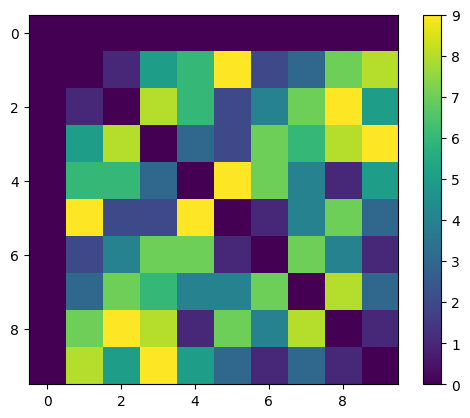

In [24]:
import matplotlib.pyplot as plt
cost_matrix = []
cost_matrix.append([0,0,0,0,0,0,0,0,0,0])
cost_matrix.append([0,0,1,5,6,9,2,3,7,8])
cost_matrix.append([0,1,0,8,6,2,4,7,9,5])
cost_matrix.append([0,5,8,0,3,2,7,6,8,9])
cost_matrix.append([0,6,6,3,0,9,7,4,1,5])
cost_matrix.append([0,9,2,2,9,0,1,4,7,3])
cost_matrix.append([0,2,4,7,7,1,0,7,4,1])
cost_matrix.append([0,3,7,6,4,4,7,0,8,3])
cost_matrix.append([0,7,9,8,1,7,4,8,0,1])
cost_matrix.append([0,8,5,9,5,3,1,3,1,0])
print("cost matrix : i번째 도시에서 j번째 도시로 갈 때 발생하는 비용\n")
print("-, -, 1, 2, 3, 4, 5, 6, 7, 8, 9번 도시")
for i in range(10):
    print(i, cost_matrix[i])

print('\n\n')

# 각 경로의 적합도를 계산하는 함수
def fitness(path, distances):
    total_distance = 0
    for i in range(len(path)-1):
        total_distance += distances[path[i]][path[i+1]]

        if i == len(path)-2:
            total_distance += distances[path[i+1]][path[0]]
    return 1/total_distance

# 경로를 선택하는 함수
def roulette_wheel_selection(paths, distances):
    total_fitness = sum([fitness(path, distances) for path in paths])
    selection_probs = [fitness(path, distances)/total_fitness for path in paths]
    
    sorted_list = sorted(enumerate(selection_probs), key=lambda x: x[1], reverse=True)
    sorted_indices = [index for index, value in sorted_list]
    
    selection_list = [paths[i] for i in sorted_indices[:18]]
    selection_list2 = [paths[i] for i in sorted_indices[-2:]]
    selection_list.extend(selection_list2)
    return selection_list


def order_crossover(parent1, parent2):
    child_list = []
    for k in range(5):
        size = len(parent1)
        gene_slice = slice(0, 0)
        while gene_slice.start == gene_slice.stop:
            gene_slice = slice(*sorted(np.random.randint(low=0, high=size, size=2)))
        child1 = [-1] * size
        child2 = [-1] * size
        child1[gene_slice] = parent1[gene_slice]
        child2[gene_slice] = parent2[gene_slice]
        remaining_positions = [i for i in range(size) if i not in range(gene_slice.start, gene_slice.stop)]
        remaining_values = [val for val in parent2 if val not in parent1[gene_slice]]
        j = 0
        for i in remaining_positions:
            child1[i] = remaining_values[j]
            j += 1
        remaining_positions = [i for i in range(size) if i not in range(gene_slice.start, gene_slice.stop)]
        remaining_values = [val for val in parent1 if val not in parent2[gene_slice]]
        j = 0
        for i in remaining_positions:
            child2[i] = remaining_values[j]
            j += 1
        child_list.append(child1)
        child_list.append(child2)
    return child_list

plt.imshow(cost_matrix)
plt.colorbar()
plt.show()

# 
### 100,000번씩 총 5번 돌림
### relative fitness가 클수록 좋은 것임
### 두 가지 포인트
### 1.반복될수록 relative fitness가 커지는가?  2. 수렴하는가?

In [26]:
import time

sample_chrm = np.arange(1,10) # feasible solution
init_population = []
random.seed(0)
population_size = 100

for i in range(population_size):
    new_chrm = copy.copy(sample_chrm)
    random.shuffle(new_chrm)
    
    init_population.append(new_chrm)
    
gene_population = init_population

print("적합도가 클수록 좋아지는 경우임")
for q in range(5):
    start = time.time()
    globals()['min_list{}'.format(q)] = []
    globals()['max_list{}'.format(q)] = []
    globals()['mean_list{}'.format(q)] = []
    
    print("{} 번 반복 중".format(q+1))
    for iter in range(100000):
        # 1. 룰렛휠선택 : population에 대해 상대적합도 계산을 하여 상위 18개, 하위 2개의 개체 추출
        selection_list = roulette_wheel_selection(paths=gene_population, distances=cost_matrix)

        # 2. 교차 연산 : 20개의 추출된 개체를 교차연산을 통해 100개 개체 생성
        numbers = list(range(20))  # 0부터 20까지의 숫자 리스트 생성
        random.shuffle(numbers)   # 리스트를 섞음

        child_list = []
        # 리스트에서 원소를 2개씩 겹치지 않게 뽑기
        for i in range(0, len(numbers)-1, 2):
            pair = [numbers[i], numbers[i+1]]

            child = order_crossover(parent1=selection_list[pair[0]], parent2=selection_list[pair[1]])
            child_list.append(child)
        child_list = np.reshape(child_list, (-1,9))
        child_list = child_list.tolist()

        if iter % 10000 == 0:
            fitness_score = [fitness(path, cost_matrix) for path in child_list]
            globals()['mean_list{}'.format(q)].append(np.min(fitness_score))
            globals()['min_list{}'.format(q)].append(np.min(fitness_score))
            globals()['max_list{}'.format(q)].append(np.max(fitness_score))
            print(iter, "th 세대 100개 중\n가장 작은 적합도 : ", np.round(np.min(fitness_score),3), "\n가장 큰 적합도 : ", 
                  np.round(np.max(fitness_score),3), "\n평균 적합도 : ", np.round(np.mean(fitness_score), 3))
    print("걸린 시간(초) : ", time.time() - start)


적합도가 클수록 좋아지는 경우임
1 번 반복 중
0 th 세대 100개 중
가장 작은 적합도 :  0.015 
가장 큰 적합도 :  0.038 
평균 적합도 :  0.026
10000 th 세대 100개 중
가장 작은 적합도 :  0.016 
가장 큰 적합도 :  0.042 
평균 적합도 :  0.025
20000 th 세대 100개 중
가장 작은 적합도 :  0.015 
가장 큰 적합도 :  0.037 
평균 적합도 :  0.026
30000 th 세대 100개 중
가장 작은 적합도 :  0.015 
가장 큰 적합도 :  0.036 
평균 적합도 :  0.025
40000 th 세대 100개 중
가장 작은 적합도 :  0.015 
가장 큰 적합도 :  0.042 
평균 적합도 :  0.025
50000 th 세대 100개 중
가장 작은 적합도 :  0.015 
가장 큰 적합도 :  0.038 
평균 적합도 :  0.026
60000 th 세대 100개 중
가장 작은 적합도 :  0.015 
가장 큰 적합도 :  0.045 
평균 적합도 :  0.025
70000 th 세대 100개 중
가장 작은 적합도 :  0.015 
가장 큰 적합도 :  0.036 
평균 적합도 :  0.026
80000 th 세대 100개 중
가장 작은 적합도 :  0.016 
가장 큰 적합도 :  0.042 
평균 적합도 :  0.025
90000 th 세대 100개 중
가장 작은 적합도 :  0.016 
가장 큰 적합도 :  0.038 
평균 적합도 :  0.025
걸린 시간(초) :  486.16695070266724
2 번 반복 중
0 th 세대 100개 중
가장 작은 적합도 :  0.015 
가장 큰 적합도 :  0.038 
평균 적합도 :  0.026
10000 th 세대 100개 중
가장 작은 적합도 :  0.015 
가장 큰 적합도 :  0.043 
평균 적합도 :  0.026
20000 th 세대 100개 중
가장 작은 적합도 :  0.016 
가장 큰 적합도 :  0.

# 
### 100,000번 반복 중 10,000번 마다 그 세대에서 생성된 100개의 chromosome 들을 relative fitness에 넣어 기록함
### 1. 100개 중 가장 큰 값
### 2. 100개 중 가장 작은 값
### 3. 100개의 평균값

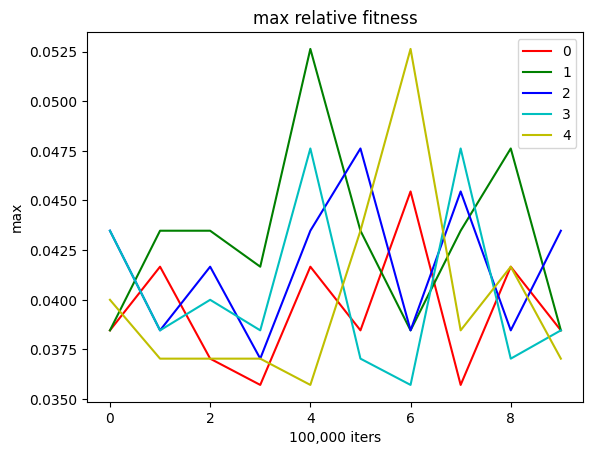

In [28]:
color_list = ['r', 'g', 'b', 'c', 'y']
for i in range(5):
    plt.title("max relative fitness")
    plt.plot(np.arange(10), globals()['max_list{}'.format(i)], color=color_list[i], label=str(i))
    plt.xlabel("100,000 iters")
    plt.ylabel("max")
    plt.legend()
plt.show()

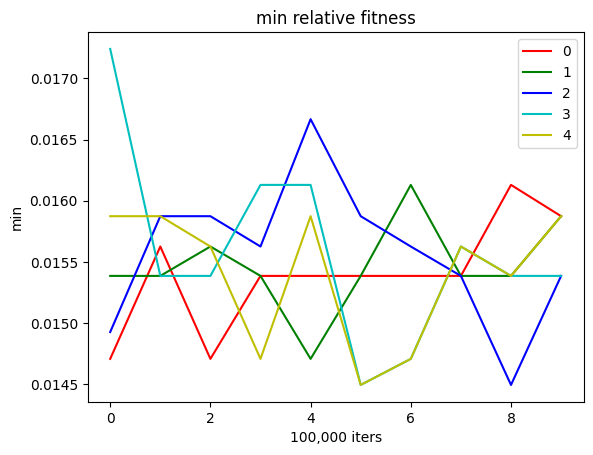

In [29]:
for i in range(5):
    plt.title("min relative fitness")
    plt.plot(np.arange(10), globals()['min_list{}'.format(i)], color=color_list[i], label=str(i))
    plt.xlabel("100,000 iters")
    plt.ylabel("min")
    plt.legend()
plt.show()

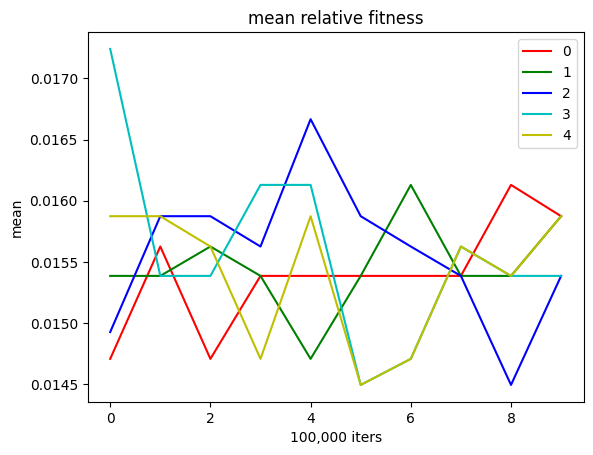

In [30]:
for i in range(5):
    plt.title("mean relative fitness")
    plt.plot(np.arange(10), globals()['mean_list{}'.format(i)], color=color_list[i], label=str(i))
    plt.xlabel("100,000 iters")
    plt.ylabel("mean")
    plt.legend()
plt.show()

# 
# 
## 수렴하였는가? 좋은 해를 찾았는가?
### 1. 수렴은 잘 모름,
### 2. 좋은 해 인지 아직 비교할 다른게 없음
#### 해보니, 가장 좋게 찾아진 chromosome(path)을 저장해서 가지고 있어야할 필요 앎

# 
## 만약 수렴이 불안정하고 좋지 않은 해를 찾은 것이라면 왜 그럴까? 어디에서 잘못된 것일까?
#### 1. Chromosome을 어떻게 표현할 것인가?
#### 2. Population : chromosome을 몇 개로 할 것인가?
#### 3. Evaluation 적합도 평가를 무엇으로 할 것인가?
#### 4. Selection 과정을 무엇으로 할 것인가?
#### 5. Crossover 을 어떻게 할 것인가?
#### 6. Mutation을 어떻게 할 것인가?
#### 7. 언제 종료할 것인가?

# 
### 가설 1. cost matrix에 기반하여 crossover 을 통해 자식을 생성할 때, 그 path가 크게 바뀌는 것을 볼 수 있고 이때 그 비용이 크게 달라지는 것 같음.
### 그래서 일단은 로컬에라도 수렴하게 해보자 라는 목적을 가짐.

### 1. crossover 을 사용하지 않고 상대적 적합도가 높은 우수한 상위를 뽑아서  적은 비율의 돌연변이만 주는 방법 생각

# 
#### mutation 구현 : 크게 바뀌어서 적합도가 크게 달라지는 경우를 방지하기 위해, 임의의 한 자리 위치의 수만 바꾸고, 바뀐 수를 나머지 수로 바꾸는 방법 생각
#### 예) [1 3 2 4 5] 에서 3이 있는 자리에 랜덤으로 바꾼 숫자가 5라면  [1 5 2 4 3] 으로 변이 , 10% 확률로

In [31]:
def mutation(lst):
    # 리스트의 길이가 1 이하이면 바꿀 요소가 없으므로 바로 반환
    if len(lst) <= 1:
        return lst
    
    # 10%의 확률로 함수 실행을 종료함
    if random.random() < 0.1:
        return lst
    
    # 바꿀 요소의 인덱스를 랜덤으로 선택
    idx1 = random.randint(0, len(lst)-1)
    idx2 = random.randint(0, len(lst)-1)
    
    # 두 인덱스가 같다면 다시 랜덤으로 선택
    while idx1 == idx2:
        idx2 = random.randint(0, len(lst)-1)
    
    # 두 요소를 바꿔줌
    lst[idx1], lst[idx2] = lst[idx2], lst[idx1]
    
    return lst

### [1, 3, 2, 4, 5] 를 예시로 mutation(비율 10%) 5번 적용해본 예

In [41]:
s = [1, 3, 2, 4, 5]
print(mutation(s))
print(mutation(s))
print(mutation(s))
print(mutation(s))
print(mutation(s))

[1, 3, 2, 4, 5]
[1, 3, 2, 4, 5]
[1, 2, 3, 4, 5]
[1, 2, 5, 4, 3]
[1, 2, 4, 5, 3]


In [32]:
import matplotlib.pyplot as plt
cost_matrix = []
cost_matrix.append([0,0,0,0,0,0,0,0,0,0])
cost_matrix.append([0,0,1,5,6,9,2,3,7,8])
cost_matrix.append([0,1,0,8,6,2,4,7,9,5])
cost_matrix.append([0,5,8,0,3,2,7,6,8,9])
cost_matrix.append([0,6,6,3,0,9,7,4,1,5])
cost_matrix.append([0,9,2,2,9,0,1,4,7,3])
cost_matrix.append([0,2,4,7,7,1,0,7,4,1])
cost_matrix.append([0,3,7,6,4,4,7,0,8,3])
cost_matrix.append([0,7,9,8,1,7,4,8,0,1])
cost_matrix.append([0,8,5,9,5,3,1,3,1,0])
print("cost matrix : i번째 도시에서 j번째 도시로 갈 때 발생하는 비용\n")
print("-, -, 1, 2, 3, 4, 5, 6, 7, 8, 9번 도시")
for i in range(10):
    print(i, cost_matrix[i])

print('\n\n')

# 각 경로의 적합도를 계산하는 함수
def fitness(path, distances):
    total_distance = 0
    for i in range(len(path)-1):
        total_distance += distances[path[i]][path[i+1]]

        if i == len(path)-2:
            total_distance += distances[path[i+1]][path[0]]
    return 1/total_distance

# 경로를 선택하는 함수
def roulette_wheel_selection(paths, distances):
    total_fitness = sum([fitness(path, distances) for path in paths])
    selection_probs = [fitness(path, distances)/total_fitness for path in paths]
    
    sorted_list = sorted(enumerate(selection_probs), key=lambda x: x[1], reverse=True)
    sorted_indices = [index for index, value in sorted_list]
    
    selection_list = [paths[i] for i in sorted_indices[:20]]
    return selection_list

cost matrix : i번째 도시에서 j번째 도시로 갈 때 발생하는 비용

-, -, 1, 2, 3, 4, 5, 6, 7, 8, 9번 도시
0 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
1 [0, 0, 1, 5, 6, 9, 2, 3, 7, 8]
2 [0, 1, 0, 8, 6, 2, 4, 7, 9, 5]
3 [0, 5, 8, 0, 3, 2, 7, 6, 8, 9]
4 [0, 6, 6, 3, 0, 9, 7, 4, 1, 5]
5 [0, 9, 2, 2, 9, 0, 1, 4, 7, 3]
6 [0, 2, 4, 7, 7, 1, 0, 7, 4, 1]
7 [0, 3, 7, 6, 4, 4, 7, 0, 8, 3]
8 [0, 7, 9, 8, 1, 7, 4, 8, 0, 1]
9 [0, 8, 5, 9, 5, 3, 1, 3, 1, 0]





### 이제 같은 초기값을 가지는 population 으로, crossover를 빼고 mutation을 넣고 동일한 환경으로 계산해봄
### 그리고 selection에서도 상위 20개만 출력함
### 그리고 모든 세대와 개체를 뒤져 가장 높은 상대적합도를 가지는 1개의 path 저장

In [56]:
import time

sample_chrm = np.arange(1,10) # feasible solution
init_population = []
random.seed(0)
population_size = 100


for i in range(population_size):
    new_chrm = copy.copy(sample_chrm)
    random.shuffle(new_chrm)
    
    init_population.append(new_chrm)
    
gene_population = init_population

print("적합도가 클수록 좋아지는 경우임")
for q in range(5):
    start = time.time()
    globals()['min_list{}'.format(q)] = []
    globals()['max_list{}'.format(q)] = []
    globals()['mean_list{}'.format(q)] = []
    
    print("{} 번 반복 중".format(q+1))
    for iter in range(100000):
        # 1. 룰렛휠선택 : population에 대해 상대적합도 계산을 하여 상위 20개
        selection_list = roulette_wheel_selection(paths=gene_population, distances=cost_matrix)
        
        # 2. mutation으로 20개를 각각 5개씩 복제하여 총 100개 자식 생성
        child_list = []
        for s in selection_list:
            for i in range(5):
                child = mutation(s)
                child_list.append(child)
            
        child_list = [list(arr) for arr in child_list]

        # 3. 100개 새로 생성된 자식에 대해 상대적 적합도가 가장 높은 chromosome 저장
        fitness_score = [fitness(path, cost_matrix) for path in child_list]
        max_value = max(fitness_score)
        max_index = fitness_score.index(max_value)
        if iter == 0:
            p_max_value = max_value
            p_max_index = max_index
            best_path = child_list[p_max_index]
        else:
            if p_max_value < max_value:
                p_max_value = max_value
                p_max_index = max_index
                best_path = child_list[p_max_index]
        
        if iter % 10000 == 0:
            print("{} th best path : {} , relative fitness : {}".format(iter, best_path, fitness(best_path, cost_matrix)))
            fitness_score = [fitness(path, cost_matrix) for path in child_list]
            globals()['mean_list{}'.format(q)].append(np.min(fitness_score))
            globals()['min_list{}'.format(q)].append(np.min(fitness_score))
            globals()['max_list{}'.format(q)].append(np.max(fitness_score))
            print(iter, "th 세대 100개 중\n가장 작은 적합도 : ", np.round(np.min(fitness_score),3), "\n가장 큰 적합도 : ", 
                  np.round(np.max(fitness_score),3), "\n평균 적합도 : ", np.round(np.mean(fitness_score), 3))
    print("{} th 유전알고리즘에서 가장 좋게 나온 path : {} , relative_fitness : {}".format(q+1, best_path, fitness(best_path, cost_matrix)))
    print("걸린 시간(초) : ", time.time() - start, '\n\n\n')


적합도가 클수록 좋아지는 경우임
1 번 반복 중
0 th best path : [3, 1, 2, 6, 5, 8, 9, 7, 4] , relative fitness : 0.034482758620689655
0 th 세대 100개 중
가장 작은 적합도 :  0.018 
가장 큰 적합도 :  0.034 
평균 적합도 :  0.024
10000 th best path : [6, 9, 8, 4, 3, 7, 1, 2, 5] , relative fitness : 0.05263157894736842
10000 th 세대 100개 중
가장 작은 적합도 :  0.018 
가장 큰 적합도 :  0.037 
평균 적합도 :  0.024
20000 th best path : [6, 9, 8, 4, 3, 7, 1, 2, 5] , relative fitness : 0.05263157894736842
20000 th 세대 100개 중
가장 작은 적합도 :  0.017 
가장 큰 적합도 :  0.028 
평균 적합도 :  0.022
30000 th best path : [6, 9, 8, 4, 3, 7, 1, 2, 5] , relative fitness : 0.05263157894736842
30000 th 세대 100개 중
가장 작은 적합도 :  0.017 
가장 큰 적합도 :  0.029 
평균 적합도 :  0.022
40000 th best path : [6, 9, 8, 4, 3, 7, 1, 2, 5] , relative fitness : 0.05263157894736842
40000 th 세대 100개 중
가장 작은 적합도 :  0.017 
가장 큰 적합도 :  0.048 
평균 적합도 :  0.023
50000 th best path : [6, 9, 8, 4, 3, 7, 1, 2, 5] , relative fitness : 0.05263157894736842
50000 th 세대 100개 중
가장 작은 적합도 :  0.018 
가장 큰 적합도 :  0.042 
평균 적합도 :  0.

70000 th best path : [5, 3, 4, 8, 9, 7, 1, 2, 6] , relative fitness : 0.05263157894736842
70000 th 세대 100개 중
가장 작은 적합도 :  0.016 
가장 큰 적합도 :  0.042 
평균 적합도 :  0.024
80000 th best path : [5, 3, 4, 8, 9, 7, 1, 2, 6] , relative fitness : 0.05263157894736842
80000 th 세대 100개 중
가장 작은 적합도 :  0.016 
가장 큰 적합도 :  0.026 
평균 적합도 :  0.021
90000 th best path : [5, 3, 4, 8, 9, 7, 1, 2, 6] , relative fitness : 0.05263157894736842
90000 th 세대 100개 중
가장 작은 적합도 :  0.018 
가장 큰 적합도 :  0.029 
평균 적합도 :  0.023
5 th 유전알고리즘에서 가장 좋게 나온 path : [5, 3, 4, 8, 9, 7, 1, 2, 6] , relative_fitness : 0.05263157894736842
걸린 시간(초) :  125.78815150260925 





#### 10,000th 세대 100개중으로 나온 것은 10,000번째마다 잰 값임,

In [58]:
# 각 경로의 적합도를 계산하는 함수
def ori_fitness(path, distances):
    total_distance = 0
    for i in range(len(path)-1):
        total_distance += distances[path[i]][path[i+1]]

        if i == len(path)-2:
            total_distance += distances[path[i+1]][path[0]]
    return total_distance

In [60]:
s1 = ori_fitness([6, 9, 8, 4, 3, 7, 1, 2, 5], cost_matrix)
s2 = ori_fitness([2, 6, 5, 3, 4, 8, 9, 7, 1], cost_matrix)
s3 = ori_fitness([3, 4, 8, 9, 7, 1, 2, 6, 5], cost_matrix)
s4 = ori_fitness([4, 8, 9, 7, 1, 2, 6, 5, 3], cost_matrix)
s5 = ori_fitness([5, 3, 4, 8, 9, 7, 1, 2, 6], cost_matrix)

In [62]:
print(s1)
print(s2)
print(s3)
print(s4)
print(s5)

19
19
19
19
19


# 희한하게 가장 적합도가 큰 path는 다 다르지만, 그 값들은 모두 같은 것을 발견함

# 
## 초기값이 같아 그런 것일 수 도 있으니, population을 다르게 초기화하여 돌려봄

In [63]:
import matplotlib.pyplot as plt
cost_matrix = []
cost_matrix.append([0,0,0,0,0,0,0,0,0,0])
cost_matrix.append([0,0,1,5,6,9,2,3,7,8])
cost_matrix.append([0,1,0,8,6,2,4,7,9,5])
cost_matrix.append([0,5,8,0,3,2,7,6,8,9])
cost_matrix.append([0,6,6,3,0,9,7,4,1,5])
cost_matrix.append([0,9,2,2,9,0,1,4,7,3])
cost_matrix.append([0,2,4,7,7,1,0,7,4,1])
cost_matrix.append([0,3,7,6,4,4,7,0,8,3])
cost_matrix.append([0,7,9,8,1,7,4,8,0,1])
cost_matrix.append([0,8,5,9,5,3,1,3,1,0])
print("cost matrix : i번째 도시에서 j번째 도시로 갈 때 발생하는 비용\n")
print("-, -, 1, 2, 3, 4, 5, 6, 7, 8, 9번 도시")
for i in range(10):
    print(i, cost_matrix[i])

print('\n\n')

# 각 경로의 적합도를 계산하는 함수
def fitness(path, distances):
    total_distance = 0
    for i in range(len(path)-1):
        total_distance += distances[path[i]][path[i+1]]

        if i == len(path)-2:
            total_distance += distances[path[i+1]][path[0]]
    return 1/total_distance

# 경로를 선택하는 함수
def roulette_wheel_selection(paths, distances):
    total_fitness = sum([fitness(path, distances) for path in paths])
    selection_probs = [fitness(path, distances)/total_fitness for path in paths]
    
    sorted_list = sorted(enumerate(selection_probs), key=lambda x: x[1], reverse=True)
    sorted_indices = [index for index, value in sorted_list]
    
    selection_list = [paths[i] for i in sorted_indices[:20]]
    return selection_list

cost matrix : i번째 도시에서 j번째 도시로 갈 때 발생하는 비용

-, -, 1, 2, 3, 4, 5, 6, 7, 8, 9번 도시
0 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
1 [0, 0, 1, 5, 6, 9, 2, 3, 7, 8]
2 [0, 1, 0, 8, 6, 2, 4, 7, 9, 5]
3 [0, 5, 8, 0, 3, 2, 7, 6, 8, 9]
4 [0, 6, 6, 3, 0, 9, 7, 4, 1, 5]
5 [0, 9, 2, 2, 9, 0, 1, 4, 7, 3]
6 [0, 2, 4, 7, 7, 1, 0, 7, 4, 1]
7 [0, 3, 7, 6, 4, 4, 7, 0, 8, 3]
8 [0, 7, 9, 8, 1, 7, 4, 8, 0, 1]
9 [0, 8, 5, 9, 5, 3, 1, 3, 1, 0]





In [65]:
import time

sample_chrm = np.arange(1,10) # feasible solution
init_population = []
#random.seed(0)
population_size = 100


for i in range(population_size):
    new_chrm = copy.copy(sample_chrm)
    random.shuffle(new_chrm)
    
    init_population.append(new_chrm)
    
gene_population = init_population

print("적합도가 클수록 좋아지는 경우임")
for q in range(5):
    start = time.time()
    globals()['min_list{}'.format(q)] = []
    globals()['max_list{}'.format(q)] = []
    globals()['mean_list{}'.format(q)] = []
    
    print("{} 번 반복 중".format(q+1))
    for iter in range(100000):
        # 1. 룰렛휠선택 : population에 대해 상대적합도 계산을 하여 상위 20개
        selection_list = roulette_wheel_selection(paths=gene_population, distances=cost_matrix)
        
        # 2. mutation으로 20개를 각각 5개씩 복제하여 총 100개 자식 생성
        child_list = []
        for s in selection_list:
            for i in range(5):
                child = mutation(s)
                child_list.append(child)
            
        child_list = [list(arr) for arr in child_list]

        # 3. 100개 새로 생성된 자식에 대해 상대적 적합도가 가장 높은 chromosome 저장
        fitness_score = [fitness(path, cost_matrix) for path in child_list]
        max_value = max(fitness_score)
        max_index = fitness_score.index(max_value)
        if iter == 0:
            p_max_value = max_value
            p_max_index = max_index
            best_path = child_list[p_max_index]
        else:
            if p_max_value < max_value:
                p_max_value = max_value
                p_max_index = max_index
                best_path = child_list[p_max_index]
        
        if iter % 10000 == 0:
            print("{} th best path : {} , relative fitness : {}".format(iter, best_path, fitness(best_path, cost_matrix)))
            fitness_score = [fitness(path, cost_matrix) for path in child_list]
            globals()['mean_list{}'.format(q)].append(np.min(fitness_score))
            globals()['min_list{}'.format(q)].append(np.min(fitness_score))
            globals()['max_list{}'.format(q)].append(np.max(fitness_score))
            print(iter, "th 세대 100개 중\n가장 작은 적합도 : ", np.round(np.min(fitness_score),3), "\n가장 큰 적합도 : ", 
                  np.round(np.max(fitness_score),3), "\n평균 적합도 : ", np.round(np.mean(fitness_score), 3))
    print("{} th 유전알고리즘에서 가장 좋게 나온 path : {} , relative_fitness : {}".format(q+1, best_path, fitness(best_path, cost_matrix)))
    print("걸린 시간(초) : ", time.time() - start, '\n\n\n')


적합도가 클수록 좋아지는 경우임
1 번 반복 중
0 th best path : [1, 7, 9, 6, 5, 2, 4, 8, 3] , relative fitness : 0.03333333333333333
0 th 세대 100개 중
가장 작은 적합도 :  0.018 
가장 큰 적합도 :  0.033 
평균 적합도 :  0.022
10000 th best path : [4, 8, 9, 6, 5, 2, 1, 7, 3] , relative fitness : 0.05263157894736842
10000 th 세대 100개 중
가장 작은 적합도 :  0.019 
가장 큰 적합도 :  0.031 
평균 적합도 :  0.023
20000 th best path : [4, 8, 9, 6, 5, 2, 1, 7, 3] , relative fitness : 0.05263157894736842
20000 th 세대 100개 중
가장 작은 적합도 :  0.016 
가장 큰 적합도 :  0.024 
평균 적합도 :  0.02
30000 th best path : [4, 8, 9, 6, 5, 2, 1, 7, 3] , relative fitness : 0.05263157894736842
30000 th 세대 100개 중
가장 작은 적합도 :  0.017 
가장 큰 적합도 :  0.029 
평균 적합도 :  0.022
40000 th best path : [4, 8, 9, 6, 5, 2, 1, 7, 3] , relative fitness : 0.05263157894736842
40000 th 세대 100개 중
가장 작은 적합도 :  0.016 
가장 큰 적합도 :  0.032 
평균 적합도 :  0.022
50000 th best path : [4, 8, 9, 6, 5, 2, 1, 7, 3] , relative fitness : 0.05263157894736842
50000 th 세대 100개 중
가장 작은 적합도 :  0.018 
가장 큰 적합도 :  0.034 
평균 적합도 :  0.02

70000 th best path : [3, 4, 8, 9, 7, 1, 2, 6, 5] , relative fitness : 0.05263157894736842
70000 th 세대 100개 중
가장 작은 적합도 :  0.017 
가장 큰 적합도 :  0.03 
평균 적합도 :  0.022
80000 th best path : [3, 4, 8, 9, 7, 1, 2, 6, 5] , relative fitness : 0.05263157894736842
80000 th 세대 100개 중
가장 작은 적합도 :  0.018 
가장 큰 적합도 :  0.031 
평균 적합도 :  0.023
90000 th best path : [3, 4, 8, 9, 7, 1, 2, 6, 5] , relative fitness : 0.05263157894736842
90000 th 세대 100개 중
가장 작은 적합도 :  0.015 
가장 큰 적합도 :  0.031 
평균 적합도 :  0.023
5 th 유전알고리즘에서 가장 좋게 나온 path : [3, 4, 8, 9, 7, 1, 2, 6, 5] , relative_fitness : 0.05263157894736842
걸린 시간(초) :  129.99742531776428 





In [66]:
s1 = ori_fitness([4, 8, 9, 6, 5, 2, 1, 7, 3], cost_matrix)
s2 = ori_fitness([4, 3, 7, 1, 2, 5, 6, 9, 8], cost_matrix)
s3 = ori_fitness([2, 5, 6, 9, 8, 4, 3, 7, 1], cost_matrix)
s4 = ori_fitness([4, 3, 5, 6, 2, 1, 7, 9, 8], cost_matrix)
s5 = ori_fitness([3, 4, 8, 9, 7, 1, 2, 6, 5], cost_matrix)

In [67]:
print(s1)
print(s2)
print(s3)
print(s4)
print(s5)

19
19
19
19
19


# 
## 같은 값에 도달하지만, 이게 가장 좋은 해일까?
### 느낌 : local minima에 자주 도달하는 것 같은데 더 작은해가 있을까?

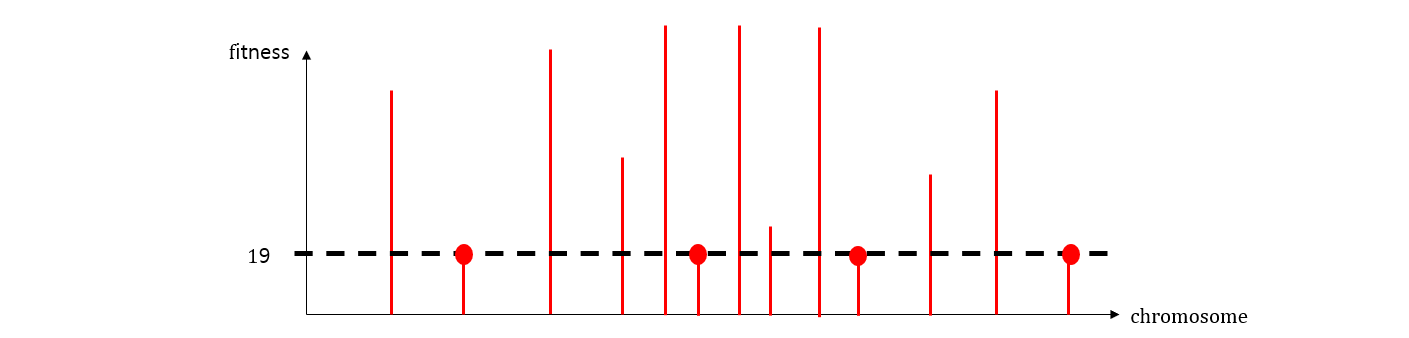